In [1]:
from tools import SL2P
from tools import read_sentinel2_safe_image
from tools.read_sentinel2_force_image import read_s2_force
from tools import dictionariesSL2P 
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import os,numpy
import rasterio

In [37]:
variableName = 'Albedo'
imageCollectionName = "S2_FORCE"  # new collection name for FORCE tiles
tile_dir = r'C:\Users\Leoun\Work\SL2P-PYTHON-main\FORCE'

In [38]:
# check variable and collection
if variableName not in dictionariesSL2P.make_net_options().keys():
    raise ValueError('Supported vegetation variables: %s' % (dictionariesSL2P.make_net_options().keys()))
if imageCollectionName not in dictionariesSL2P.make_net_options()[variableName].keys():
    raise ValueError('Supported EO datasets: %s' % (dictionariesSL2P.make_net_options()[variableName].keys()))

In [39]:
# read FORCE tile
s2 = read_s2_force(tile_dir)  # replaces read_sentinel2_safe_image.read_s2

In [40]:
# prepare SL2P input
sl2p_inp = SL2P.prepare_sl2p_inp(s2, variableName, imageCollectionName)

Skipping resampling: Assuming FORCE tile angles are matched to S2_FORCE resolution.
Computing cosSZA, cosVZA and cosRAA
Scaling Sentinel-2 bands
Selecting sl2p input bands
Done!


In [41]:
varmap=SL2P.SL2P(sl2p_inp,variableName,imageCollectionName)

Generating sl2p input data flag
Run SL2P...
SL2P start: 2025-10-22 11:36:50.226181
SL2P end: 2025-10-22 11:36:51.520517
Generating sl2p output product flag
Done


In [42]:
# Define the output path variables (must be present in your namespace)
output_dir = r'C:\Users\Leoun\Work\SL2P-FORCE-main\output\new'
tile_basename = os.path.basename(os.path.normpath(tile_dir))
imageName = os.path.join(output_dir, tile_basename) # Create a base name to replace the SAFE filename

In [43]:
profile = s2['profile'].copy()
profile.update({
    'count': 4, 
    'dtype': rasterio.float32, # Use float32 for all 4 bands
    'driver': 'GTiff'
}) 

flag_inp = varmap['sl2p_inputFlag'].astype(numpy.float32)
flag_out = varmap['sl2p_outputFlag'].astype(numpy.float32)

output_path = imageName + f"_{variableName}_PRODUCTS.tif"

# 4. Write all 4 layers
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(varmap[variableName].astype(numpy.float32), 1)
    dst.write(varmap[variableName+'_uncertainty'].astype(numpy.float32), 2)
    dst.write(flag_inp, 3) # Write the converted input flag
    dst.write(flag_out, 4)  # Write the converted output flag

print(f"✅ 4-Band product saved successfully to: {output_path}")

✅ 4-Band product saved successfully to: C:\Users\Leoun\Work\SL2P-FORCE-main\output\new\FORCE_Albedo_PRODUCTS.tif


In [16]:
# Ensure you import the new function name
from tools.read_sentinel2_force_image import read_s2_force, read_single_tif_s2 
from tools import read_sentinel2_safe_image # Keep this base import if needed elsewhere

In [45]:
variableName = 'Albedo'
imageCollectionName = "S2_SINGLE_TIF" # *** NEW MODE ***

In [46]:
# 1. Path to the multi-band TIF (Spectral data)
single_tif_path = r'C:\Users\Leoun\Work\safe_equi\20190726_LEVEL2_SEN2A_BOA.tif'

# 2. Path to the Sentinel-2 .SAFE directory (Angular data source)
angle_tile_dir = r'C:\Users\Leoun\Work\SL2P-PYTHON-main\FORCE'

# Define base name for output
tile_basename = os.path.splitext(os.path.basename(single_tif_path))[0]

In [47]:
print(f"Reading TIF bands: {single_tif_path}")
print(f"Reading SAFE angles: {angle_tile_dir}")

# *** NEW HYBRID READER CALL ***
s2 = read_single_tif_s2(single_tif_path, angle_tile_dir)

Reading TIF bands: C:\Users\Leoun\Work\safe_equi\20190726_LEVEL2_SEN2A_BOA.tif
Reading SAFE angles: C:\Users\Leoun\Work\SL2P-PYTHON-main\FORCE


In [48]:
# prepare SL2P input
sl2p_inp = SL2P.prepare_sl2p_inp(s2, variableName, imageCollectionName)

Resample sun and view (sensor) angles for SAFE format
Computing cosSZA, cosVZA and cosRAA
Scaling Sentinel-2 bands
Selecting sl2p input bands
Done!


In [49]:
varmap=SL2P.SL2P(sl2p_inp,variableName,imageCollectionName)

Generating sl2p input data flag
Run SL2P...
SL2P start: 2025-11-04 14:20:06.668795
SL2P end: 2025-11-04 14:20:11.219135
Generating sl2p output product flag
Done


In [50]:
# Define the output path variables (must be present in your namespace)
output_dir = r'C:\Users\Leoun\Work\SL2P-FORCE-main\output\test'
tile_basename = os.path.splitext(os.path.basename(single_tif_path))[0]
imageName = os.path.join(output_dir, tile_basename) # Create a base name to replace the SAFE filename

In [51]:
profile = s2['profile'].copy()
profile.update({
    'count': 4, 
    'dtype': rasterio.float32, # Use float32 for all 4 bands
    'driver': 'GTiff'
}) 

flag_inp = varmap['sl2p_inputFlag'].astype(numpy.float32)
flag_out = varmap['sl2p_outputFlag'].astype(numpy.float32)

output_path = imageName + f"_{variableName}_PRODUCT.tif"

# 4. Write all 4 layers
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(varmap[variableName].astype(numpy.float32), 1)
    dst.write(varmap[variableName+'_uncertainty'].astype(numpy.float32), 2)
    dst.write(flag_inp, 3) # Write the converted input flag
    dst.write(flag_out, 4)  # Write the converted output flag

print(f"✅ 4-Band product saved successfully to: {output_path}")

✅ 4-Band product saved successfully to: C:\Users\Leoun\Work\SL2P-FORCE-main\output\test\20190726_LEVEL2_SEN2A_BOA_Albedo_PRODUCT.tif


In [2]:
from tools.read_sentinel2_force_image import read_s2_force, read_single_tif_xml_angles

In [3]:
variableName = 'LAI'
imageCollectionName = "S2_SINGLE_TIF" # *** ZERO OFFSET MODE ***

In [4]:
# 1. Path to the multi-band TIF (Spectral data)
single_tif_path = r'C:\Users\Leoun\Work\safe_equi\20190726_LEVEL2_SEN2A_BOA.tif' 

# 2. Path to the Sentinel-2 .SAFE directory (Angular data source)
safe_angles_dir = r'C:\Users\Leoun\Work\SL2P-PYTHON-main\S2A_MSIL2A_20190726T102031_N0500_R065_T33UVU_20230509T235130.SAFE' # **Adjust to the root .SAFE folder**
tile_basename = os.path.splitext(os.path.basename(single_tif_path))[0]

In [5]:
print(f"Reading TIF bands: {single_tif_path}")
print(f"Reading XML angles from SAFE directory: {safe_angles_dir}")

# *** NEW XML HYBRID READER CALL ***
s2 = read_single_tif_xml_angles(single_tif_path, safe_angles_dir)

Reading TIF bands: C:\Users\Leoun\Work\safe_equi\20190726_LEVEL2_SEN2A_BOA.tif
Reading XML angles from SAFE directory: C:\Users\Leoun\Work\SL2P-PYTHON-main\S2A_MSIL2A_20190726T102031_N0500_R065_T33UVU_20230509T235130.SAFE
Reading and upscaling full 10m angle grid from SAFE XML...
Reading Sentinel-2 image


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:40<00:00,  5.77s/it]


Applying Pixel Clip: Row=0:3000, Col=0:3000


In [6]:
# prepare SL2P input
sl2p_inp = SL2P.prepare_sl2p_inp(s2, variableName, imageCollectionName)

Skipping resampling: Angle shapes already matched (e.g., FORCE TIF).
Computing cosSZA, cosVZA and cosRAA
Scaling Sentinel-2 bands
Selecting sl2p input bands

--- Stacking Input Arrays ---
Done!


In [7]:
varmap=SL2P.SL2P(sl2p_inp,variableName,imageCollectionName)

Generating sl2p input data flag
Run SL2P...
SL2P start: 2025-11-13 16:47:58.584995
SL2P end: 2025-11-13 16:47:59.589556
Generating sl2p output product flag
Done


In [8]:
output_dir = r'C:\Users\Leoun\Work\SL2P-FORCE-main\output\xml_fix2'
imageName = os.path.join(output_dir, tile_basename) # Create a base name to replace the SAFE filename

In [9]:
profile = s2['profile'].copy()
profile.update({
    'count': 4, 
    'dtype': rasterio.float32, # Use float32 for all 4 bands
    'driver': 'GTiff'
}) 

flag_inp = varmap['sl2p_inputFlag'].astype(numpy.float32)
flag_out = varmap['sl2p_outputFlag'].astype(numpy.float32)

output_path = imageName + f"_{variableName}_PRODUCT.tif"

# 4. Write all 4 layers
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(varmap[variableName].astype(numpy.float32), 1)
    dst.write(varmap[variableName+'_uncertainty'].astype(numpy.float32), 2)
    dst.write(flag_inp, 3) # Write the converted input flag
    dst.write(flag_out, 4)  # Write the converted output flag

print(f"✅ 4-Band product saved successfully to: {output_path}")

✅ 4-Band product saved successfully to: C:\Users\Leoun\Work\SL2P-FORCE-main\output\xml_fix2\20190726_LEVEL2_SEN2A_BOA_LAI_PRODUCT.tif


Plotting VZA with range [0.0° to 10.0°]
The large white block corresponds to NaN values in the VZA input array.


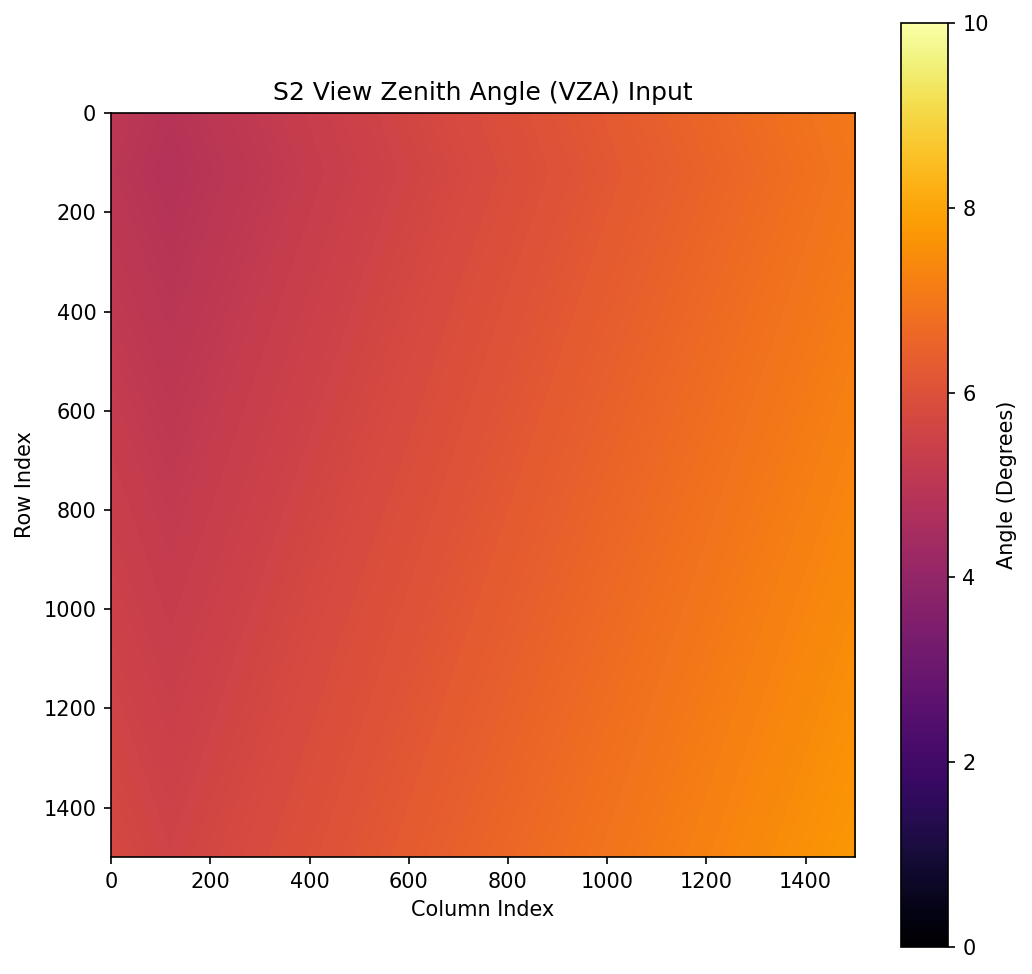

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Get VZA Data and Define Plot Range ---

vza_data = s2['VZA']

# Define the max/min range for the color bar
# Vmin=0 and Vmax=90 covers the entire physical range of a zenith angle
VMIN_VZA = 0.0
VMAX_VZA = 10.0 

# If you only want to see the range of valid data (e.g., 5 to 45 degrees), use:
# VMIN_VZA = np.nanmin(vza_data)
# VMAX_VZA = np.nanmax(vza_data)


# --- 2. Create Plot ---
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=150)

# Use 'inferno' or 'magma' to clearly show low (bright) to high (dark) values.
# NaN values will be rendered as the background color (often white or gray).
im = ax.imshow(vza_data, vmin=VMIN_VZA, vmax=VMAX_VZA, cmap='inferno')

ax.set_title(f'S2 View Zenith Angle (VZA) Input')
ax.set_xlabel('Column Index')
ax.set_ylabel('Row Index')

# Add color bar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', label='Angle (Degrees)')

# Add an annotation for clarity
print(f"Plotting VZA with range [{VMIN_VZA:.1f}° to {VMAX_VZA:.1f}°]")
print("The large white block corresponds to NaN values in the VZA input array.")

plt.show()